<a href="https://colab.research.google.com/github/JoaquinGonzalezSimon/Data_science_and_ML_from_Medium/blob/main/AutoTS_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AutoTS training
https://thecleverprogrammer.com/2021/04/19/autots-in-python-tutorial/

In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 63 kB 143 kB/s 
     |████████████████████████████████| 6.4 MB 11.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
import datetime
from datetime import date, timedelta

In [7]:
end_date = date.today().strftime('%Y-%m-%d')
end_date

'2022-06-02'

In [8]:
start_date = date.today() - timedelta(days=730)
start_date = start_date.strftime('%Y-%m-%d')
start_date

'2020-06-02'

In [9]:
data = yf.download('AAPL', start=start_date, end=end_date, progress=True)

[*********************100%***********************]  1 of 1 completed


In [10]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-02,80.187500,80.860001,79.732498,80.834999,79.837837,87642800
2020-06-03,81.165001,81.550003,80.574997,81.279999,80.277344,104491200
2020-06-04,81.097504,81.404999,80.195000,80.580002,79.585991,87560400
2020-06-05,80.837502,82.937500,80.807503,82.875000,81.852669,137250400
2020-06-08,82.562500,83.400002,81.830002,83.364998,82.336624,95654400


In [12]:
data['Date'] = data.index
data.reset_index(drop=True, inplace=True)
data.head()

,Open,High,Low,Close,Adj Close,Volume,Date
0,80.187500,80.860001,79.732498,80.834999,79.837837,87642800,2020-06-02
1,81.165001,81.550003,80.574997,81.279999,80.277344,104491200,2020-06-03
2,81.097504,81.404999,80.195000,80.580002,79.585991,87560400,2020-06-04
3,80.837502,82.937500,80.807503,82.875000,81.852669,137250400,2020-06-05
4,82.562500,83.400002,81.830002,83.364998,82.336624,95654400,2020-06-08


In [13]:
df=data.copy()
df.head()

,Open,High,Low,Close,Adj Close,Volume,Date
0,80.187500,80.860001,79.732498,80.834999,79.837837,87642800,2020-06-02
1,81.165001,81.550003,80.574997,81.279999,80.277344,104491200,2020-06-03
2,81.097504,81.404999,80.195000,80.580002,79.585991,87560400,2020-06-04
3,80.837502,82.937500,80.807503,82.875000,81.852669,137250400,2020-06-05
4,82.562500,83.400002,81.830002,83.364998,82.336624,95654400,2020-06-08


In [14]:
df=df[['Date', 'Close']]
df.head()

,Date,Close
0,2020-06-02,80.834999
1,2020-06-03,81.279999
2,2020-06-04,80.580002
3,2020-06-05,82.875000
4,2020-06-08,83.364998


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    505 non-null    datetime64[ns]
 1   Close   505 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.0 KB


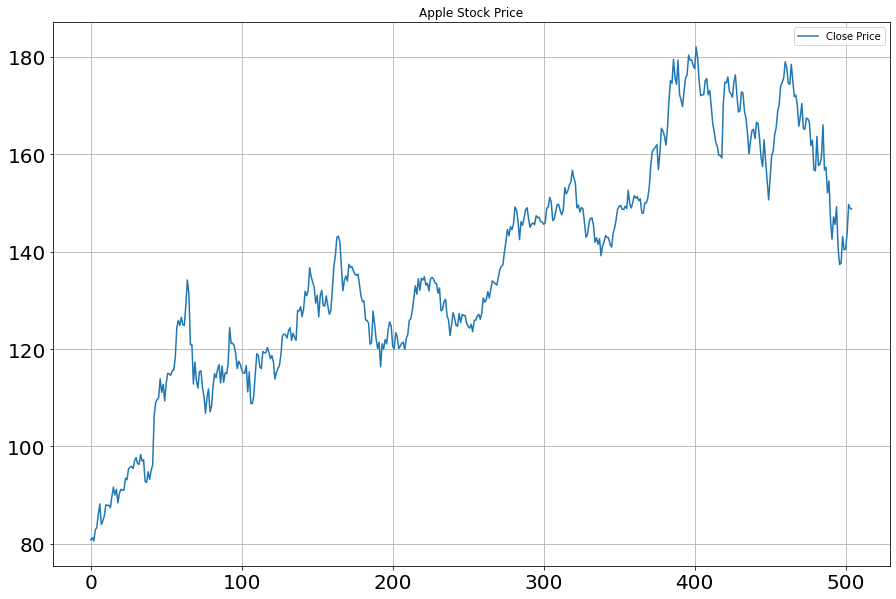

In [19]:
data.Close.plot(figsize=(15,10), 
                title='Apple Stock Price', fontsize=20, label='Close Price')
plt.legend()
plt.grid()
plt.show()

### Import AutoTS library

In [21]:
!pip install autots

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 470 kB 5.3 MB/s 


In [22]:
from autots import AutoTS

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [23]:
model = AutoTS(forecast_length=10, frequency='infer',
               ensemble='simple', drop_data_older_than_periods=200)
model.fit(df, date_col='Date', value_col='Close', id_col=None)

Inferred frequency is: B
Old data dropped by `drop_data_older_than_periods`.
Model Number: 1 with model AverageValueNaive in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model DatepartRegression in generation 0 of 10
Model Number: 5 with model DatepartRegression in generation 0 of 10
Model Number: 6 with model DatepartRegression in generation 0 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 7 with model DatepartRegression in generation 0 of 10
Epoch 1/50
6/6 [==============================] - 11s 9ms/step - loss: 0.3842
Epoch 2/50
6/6 [==============================] - 0s 9ms/step - loss: 0.3759
Epoch 3/50
6/6 [==============================] - 0s 12ms/step - loss: 0.3697
Epoch 4/50
6/6 [==============================] - 0s 11ms/step - loss: 0.3673
Epoch 5/50
6/6 [==============================] - 0s 10ms/step - loss: 0.3566
Epoch 6/50
6/6 [==============================] - 0s 11ms/step - loss: 0.3501
Epoch 7/50
6/6 [==============================] - 0s 10ms/step - loss: 0.3513
Epoch 8/50
6/6 [==============================] - 0s 14ms/step - loss: 0.3405
Epoch 9/50
6/6 [==============================] - 0s 8ms/step - loss: 0.3289
Epoch 10/50
6/6 [==============================] - 0s 13ms/step - loss: 0.3222
Epoch 11/50
6/6 [==============================] - 0s 10ms/step - loss: 0.3176
Epoch 12/50
6/6 [==============================] - 0s 14ms/step - loss: 0.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 30 with model FBProphet in generation 0 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 31 with model MultivariateRegression in generation 0 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 32 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 32: MultivariateRegression
Model Number: 33 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 33: DatepartRegression
Model Number: 34 with model SeasonalNaive in generation 0 of 10
Model Number: 35 with model DatepartRegression in generation 0 of 10
Model Number: 36 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError('Provided exogenous values are not of the appropriate shape. Required (10, 1), got (10,).') in model 36: UnobservedComponents
Model Number: 37 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError('Provided exogenous values are not of the appropriate shape. Required (10, 1), got (10,).') in model 37: UnobservedComponents
Model Number: 38 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 48 with model FBProphet in generation 0 of 10
Model Number: 49 with model SeasonalNaive in generation 0 of 10
Model Number: 50 with model DatepartRegression in generation 0 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 51 with model NVAR in generation 0 of 10
Model Number: 52 with model Theta in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'statsmodels.tsa.forecasting'") in model 52: Theta
Model Number: 53 with model ConstantNaive in generation 0 of 10


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 54 with model LastValueNaive in generation 0 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 54: LastValueNaive
Model Number: 55 with model AverageValueNaive in generation 0 of 10
Model Number: 56 with model GLS in generation 0 of 10
Model Number: 57 with model SeasonalNaive in generation 0 of 10
Model Number: 58 with model GLM in generation 0 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 58: GLM
Model Number: 59 with model ETS in generation 0 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 60 with model FBProphet in generation 0 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 61 with model UnobservedComponents in generation 0 of 10
Model Number: 62 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 62: VAR
Model Number: 63 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 63: VECM
Model Number: 64 with model WindowRegression in generation 0 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 64: WindowRegression
Model Number: 65 with model DatepartRegression in generation 0 of 10
Model Number: 66 with model MultivariateRegression in generation 0 of 10
Model Number: 67 with model UnivariateMotif in generation 0 of 10
Model Number: 68 with model MultivariateMotif in generation 0 of 10
Model Number: 69 with model SectionalMotif in generation 0 of 10
Model Number: 70 with model NVAR in generation 0 of 10
Model Number: 71 with model Theta in generation 0 of 10
Template Eval Error: ModuleNotFound

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:48: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:412: RuntimeWarning: invalid value encountered in true_divide
  avg = np.multiply(a, wgt, dtype=result_dtype).sum(axis)/scl


Model Number: 97 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 97: DatepartRegression
Model Number: 98 with model Theta in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'statsmodels.tsa.forecasting'") in model 98: Theta
Model Number: 99 with model ConstantNaive in generation 0 of 10
Model Number: 100 with model NVAR in generation 0 of 10
Model Number: 101 with model ConstantNaive in generation 0 of 10
Model Number: 102 with model FBProphet in generation 0 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 103 with model ConstantNaive in generation 0 of 10
Model Number: 104 with model DatepartRegression in generation 0 of 10
Epoch 1/50
3/3 [==============================] - 10s 35ms/step - loss: 105.5389
Epoch 2/50
3/3 [==============================] - 0s 23ms/step - loss: 110.9122
Epoch 3/50
3/3 [==============================] - 0s 23ms/step - loss: 110.0312
Epoch 4/50
3/3 [==============================] - 0s 23ms/step - loss: 106.6186
Epoch 5/50
3/3 [==============================] - 0s 20ms/step - loss: 100.1441
Epoch 6/50
3/3 [==============================] - 0s 22ms/step - loss: 103.4184
Epoch 7/50
3/3 [==============================] - 0s 19ms/step - loss: 99.5225
Epoch 8/50
3/3 [==============================] - 0s 23ms/step - loss: 103.4080
Epoch 9/50
3/3 [==============================] - 0s 19ms/step - loss: 103.6609
Epoch 10/50
3/3 [==============================] - 0s 19ms/step - loss: 100.5946
Epoch 11/50
3/3 [==============================] - 0s 20ms/step 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 104: DatepartRegression
Model Number: 105 with model FBProphet in generation 0 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 106 with model FBProphet in generation 0 of 10
Model Number: 107 with model MultivariateRegression in generation 0 of 10
Model Number: 108 with model Theta in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'statsmodels.tsa.forecasting'") in model 108: Theta
Model Number: 109 with model MultivariateRegression in generation 0 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 110 with model LastValueNaive in generation 0 of 10
Model Number: 111 with model GLS in generation 0 of 10
Model Number: 112 with model ConstantNaive in generation 0 of 10
Model Number: 113 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 113: DatepartRegression
Model Number: 114 with model GLS in generation 0 of 10
Model Number: 115 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError('Provided exogenous values are not of the appropriate shape. Required (10, 1), got (10,).') in model 115: UnobservedComponents
Model Number: 116 with model DatepartRegression in generation 0 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 117 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 117: DatepartRegression
Model Number: 118 with model UnobservedComponents in generation 0 of 10
Model Number: 119 with model MultivariateRegression in generation 0 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 119: MultivariateRegression
Model Number: 120 with model UnivariateMotif in generation 0 of 10
Model Number: 121 with model SeasonalNaive in generation 0 of 10
Model Number: 122 with model GLS in generation 0 of 10
Model Number: 123 with model SectionalMotif in generation 0 of 10
Model Number: 124 with model MultivariateMotif in generation 0 of 10
Model Number: 125 with model UnivariateMotif in generation 0 of 10
Model Number: 126 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 126: VAR
Model Number: 127 with model

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.

Model Number: 147 with model ARDL in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 147: ARDL
Model Number: 148 with model LastValueNaive in generation 0 of 10
Model Number: 149 with model ConstantNaive in generation 0 of 10
Model Number: 150 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 150: VECM
Model Number: 151 with model NVAR in generation 0 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 151: NVAR
Model Number: 152 with model NVAR in generation 0 of 10
New Generation: 1 of 10
Model Number: 153 with model SectionalMotif in generation 1 of 10
Model Number: 154 with model SectionalMotif in generation 1 of 10
Model Number: 155 with model SectionalMotif in generation 1 of 10
Model Number: 156 with model SectionalMotif in generation 1 of 10
Model Number: 157 with model DatepartRegression in generation 1 of 10
Te

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 160 with model NVAR in generation 1 of 10
Model Number: 161 with model NVAR in generation 1 of 10
Model Number: 162 with model NVAR in generation 1 of 10
Model Number: 163 with model NVAR in generation 1 of 10
Model Number: 164 with model LastValueNaive in generation 1 of 10
Model Number: 165 with model LastValueNaive in generation 1 of 10
Model Number: 166 with model LastValueNaive in generation 1 of 10
Model Number: 167 with model WindowRegression in generation 1 of 10
Model Number: 168 with model WindowRegression in generation 1 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


Model Number: 169 with model WindowRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 169: WindowRegression
Model Number: 170 with model ETS in generation 1 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 171 with model ETS in generation 1 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 172 with model ETS in generation 1 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 173 with model ETS in generation 1 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 174 with model UnobservedComponents in generation 1 of 10
Model Number: 175 with model UnobservedComponents in generation 1 of 10
Template Eval Error: ValueError('Provided exogenous values are not of the appropriate shape. Required (10, 1), g

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.

Model Number: 185 with model MultivariateRegression in generation 1 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.

Model Number: 186 with model MultivariateRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 186: MultivariateRegression
Model Number: 187 with model MultivariateRegression in generation 1 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 188 with model UnivariateMotif in generation 1 of 10
Model Number: 189 with model UnivariateMotif in generation 1 of 10
Model Number: 190 with model UnivariateMotif in generation 1 of 10
Model Number: 191 with model UnivariateMotif in generation 1 of 10
Model Number: 192 with model GLS in generation 1 of 10
Model Number: 193 with model GLS in generation 1 of 10
Model Number: 194 with model GLS in generation 1 of 10
Model Number: 195 with model MultivariateMotif in generation 1 of 10
Template Eval Error: ValueError('Model MultivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 195: MultivariateMotif
Model Number: 196 with model MultivariateMotif in generation 1 of 10
Model Number: 197 with model MultivariateMotif in generation 1 of 10
Model Number: 198 with model MultivariateMotif in generation 1 of 10


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:48: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:412: RuntimeWarning: invalid value encountered in true_divide
  avg = np.multiply(a, wgt, dtype=result_dtype).sum(axis)/scl


Model Number: 199 with model FBProphet in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 199: FBProphet
Model Number: 200 with model FBProphet in generation 1 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 201 with model FBProphet in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 201: FBProphet
Model Number: 202 with model FBProphet in generation 1 of 10
Model Number: 203 with model ConstantNaive in generation 1 of 10
Model Number: 204 with model ConstantNaive in generation 1 of 10
Model Number: 205 with model ConstantNaive in generation 1 of 10
Model Number: 206 with model GLM in generation 1 of 10


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1223: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)


Model Number: 207 with model GLM in generation 1 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 207: GLM
Model Number: 208 with model GLM in generation 1 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 208: GLM
Model Number: 209 with model GLM in generation 1 of 10
Model Number: 210 with model VAR in generation 1 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 210: VAR
Model Number: 211 with model VAR in generation 1 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 211: VAR
Model Number: 212 with model VAR in generation 1 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 212: VAR
Mod

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.2s finished


Model Number: 236 with model DatepartRegression in generation 2 of 10
Template Eval Error: ValueError('Failed to convert a NumPy array to a Tensor (Unsupported object type int).') in model 236: DatepartRegression
Model Number: 237 with model AverageValueNaive in generation 2 of 10
Model Number: 238 with model AverageValueNaive in generation 2 of 10
Model Number: 239 with model AverageValueNaive in generation 2 of 10
Model Number: 240 with model LastValueNaive in generation 2 of 10
Model Number: 241 with model LastValueNaive in generation 2 of 10
Model Number: 242 with model WindowRegression in generation 2 of 10
Model Number: 243 with model WindowRegression in generation 2 of 10
Model Number: 244 with model WindowRegression in generation 2 of 10
Model Number: 245 with model ETS in generation 2 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 246 with model ETS in generation 2 of 10
ETS error TypeError("__init__() got an unexpected 

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 259 with model MultivariateMotif in generation 2 of 10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 260 with model MultivariateMotif in generation 2 of 10
Model Number: 261 with model MultivariateMotif in generation 2 of 10
Model Number: 262 with model MultivariateMotif in generation 2 of 10
Model Number: 263 with model ConstantNaive in generation 2 of 10
Model Number: 264 with model ConstantNaive in generation 2 of 10
Model Number: 265 with model ConstantNaive in generation 2 of 10
Model Number: 266 with model FBProphet in generation 2 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 267 with model FBProphet in generation 2 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 268 with model FBProphet in generation 2 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 269 with model FBProphet in generation 2 of 10
Model Number: 270 with model UnivariateMotif in generation 2 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 270: UnivariateMotif
Model Number: 271 with model UnivariateMotif in generation 2 of 10
Model Number: 272 with model UnivariateMotif in generation 2 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 272: UnivariateMotif
Model Number: 273 with model UnivariateMotif in generation 2 of 10
Model Number: 274 with model GLS in generation 2 of 10
Model Number: 275 with model GLS in generation 2 of 10
Model Number: 276 with model GLS in generation 2 of 10
Model Number: 277 with model GLM in generation 2 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 277: GLM
Model Number: 278 with model GLM in genera

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1223: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)


Model Number: 280 with model GLM in generation 2 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 280: GLM
Model Number: 281 with model VAR in generation 2 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 281: VAR
Model Number: 282 with model VAR in generation 2 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 282: VAR
Model Number: 283 with model VAR in generation 2 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 283: VAR
Model Number: 284 with model VAR in generation 2 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 284: VAR
Model Number: 285 with model VECM in generation 2 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 285: VECM
Model Number: 286 with model VECM in genera

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 306 with model WindowRegression in generation 3 of 10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 307 with model DatepartRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 307: DatepartRegression
Model Number: 308 with model DatepartRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 308: DatepartRegression
Model Number: 309 with model DatepartRegression in generation 3 of 10
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 310 with model AverageValueNaive in generation 3 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 311 with model AverageValueNaive in generation 3 of 10
Model Number: 312 with model AverageValueNaive in generation 3 of 10
Model Number: 313 with model LastValueNaive in generation 3 of 10
Model Number: 314 with model LastValueNaive in generation 3 of 10
Model Number: 315 with model MultivariateRegression in generation 3 of 10
Model Number: 316 with model MultivariateRegression in generation 3 of 10
Model Number: 317 with model MultivariateRegression in generation 3 of 10
Model Number: 318 with model MultivariateRegression in generation 3 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 319 with model ETS in generation 3 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 320 with model UnobservedComponents in generation 3 of 10
Template Eval Error: ValueError('Provided exogenous values are not of the appropriate shape. Required (10, 1), got (10,).') in model 320: UnobservedComponents
Model Number: 321 with model UnobservedComponents in generation 3 of 10
Model Number: 322 with model UnobservedComponents in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 322: UnobservedComponents
Model Number: 323 with model SeasonalNaive in generation 3 of 10
Model Number: 324 with model SeasonalNaive in generation 3 of 10
Model Number: 325 with model SeasonalNaive in generation 3 of 10
Model Number: 326 with model SeasonalNaive in generation 3 of 10
Model Number: 327 with model GLS in generation 3 of 10
Model Number: 328 with model GLS in generatio

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 29.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 338 with model FBProphet in generation 3 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 339 with model FBProphet in generation 3 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 340 with model FBProphet in generation 3 of 10
Model Number: 341 with model UnivariateMotif in generation 3 of 10
Model Number: 342 with model UnivariateMotif in generation 3 of 10
Model Number: 343 with model UnivariateMotif in generation 3 of 10
Model Number: 344 with model UnivariateMotif in generation 3 of 10
Model Number: 345 with model GLM in generation 3 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 345: GLM
Model Number: 346 with model GLM in generation 3 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 346: GLM
Model Number: 347 with model GLM in generation 3 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') i

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

Model Number: 374 with model WindowRegression in generation 4 of 10
Model Number: 375 with model DatepartRegression in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 375: DatepartRegression
Model Number: 376 with model DatepartRegression in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 376: DatepartRegression
Model Number: 377 with model DatepartRegression in generation 4 of 10
Epoch 1/50
6/6 [==============================] - 11s 37ms/step - loss: 0.1607
Epoch 2/50
6/6 [==============================] - 0s 34ms/step - loss: 0.0851
Epoch 3/50
6/6 [==============================] - 0s 37ms/step - loss: 0.1044
Epoch 4/50
6/6 [==============================] - 0s 38ms/step - loss: 0.0844
Epoch 5/50
6/6 [==============================] - 0s 37ms/step - loss: 0.0855
Epoch 6/50
6/6 [==============================] - 0s 38ms/step - loss: 0.0942
Epoch 7/5

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 410 with model FBProphet in generation 4 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 29.


Model Number: 411 with model FBProphet in generation 4 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 412 with model FBProphet in generation 4 of 10
Model Number: 413 with model UnivariateMotif in generation 4 of 10
Model Number: 414 with model UnivariateMotif in generation 4 of 10
Model Number: 415 with model UnivariateMotif in generation 4 of 10
Model Number: 416 with model UnivariateMotif in generation 4 of 10
Model Number: 417 with model GLM in generation 4 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 417: GLM
Model Number: 418 with model GLM in generation 4 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 418: GLM
Model Number: 419 with model GLM in generation 4 of 10
Model Number: 420 with model GLM in generation 4 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 420: GLM
Model Number: 421 with model VAR in generation 4 of 10
Template Eval Err

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1227: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Template Eval Error: ValueError('Only gave one variable to VECM') in model 426: VECM
Model Number: 427 with model VECM in generation 4 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 427: VECM
Model Number: 428 with model VECM in generation 4 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 428: VECM
Model Number: 429 with model ARDL in generation 4 of 10
Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api' (/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/api.py)") in model 429: ARDL
Model Number: 430 with model ARDL in generation 4 of 10
Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api' (/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/api.py)") in model 430: ARDL
Model Number: 431 with model ARDL in generation 4 of 10
Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api' (/usr/local/lib/python3.7/dist-pac

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Epoch 1/50
24/24 [==============================] - 12s 63ms/step - loss: 9.3423
Epoch 2/50
24/24 [==============================] - 1s 47ms/step - loss: 9.2725
Epoch 3/50
24/24 [==============================] - 1s 50ms/step - loss: 9.0762
Epoch 4/50
24/24 [==============================] - 1s 52ms/step - loss: 9.1356
Epoch 5/50
24/24 [==============================] - 1s 52ms/step - loss: 9.5456
Epoch 6/50
24/24 [==============================] - 1s 51ms/step - loss: 9.2047
Epoch 7/50
24/24 [==============================] - 1s 48ms/step - loss: 9.0275
Epoch 8/50
24/24 [==============================] - 2s 73ms/step - loss: 8.8596
Epoch 9/50
24/24 [==============================] - 1s 51ms/step - loss: 8.4926
Epoch 10/50
24/24 [==============================] - 1s 48ms/step - loss: 8.2360
Epoch 11/50
24/24 [==============================] - 1s 51ms/step - loss: 8.1491
Epoch 12/50
24/24 [==============================] - 1s 53ms/step - loss: 9.9632
Epoch 13/50
24/24 [=================

Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 448: DatepartRegression
Model Number: 449 with model DatepartRegression in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 449: DatepartRegression
Model Number: 450 with model DatepartRegression in generation 5 of 10
Model Number: 451 with model LastValueNaive in generation 5 of 10
Model Number: 452 with model LastValueNaive in generation 5 of 10
Model Number: 453 with model LastValueNaive in generation 5 of 10
Model Number: 454 with model AverageValueNaive in generation 5 of 10
Model Number: 455 with model AverageValueNaive in generation 5 of 10
Model Number: 456 with model AverageValueNaive in generation 5 of 10
Model Number: 457 with model UnobservedComponents in generation 5 of 10
Template Eval Error: ValueError('Provided exogenous values are not of the appropriate shape. Required (10

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 461 with model MultivariateRegression in generation 5 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 462 with model MultivariateRegression in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 462: MultivariateRegression
Model Number: 463 with model MultivariateRegression in generation 5 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 464 with model ETS in generation 5 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 465 with model ETS in generation 5 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS failed on Close with ValueError('endog must be strictly positive when using multiplicative trend or seasonal components.')
Model Number: 466 with model ETS in generation 5 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 467 with model ETS in generation 5 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS failed on Close with ValueError('endog must be strictly positive when using multiplicative trend or seasonal components.')
Model Number: 468 with model SeasonalNaive in generation 5 of 10
Model Number: 469 with model SeasonalNaive in generation 5 of 10
Model Number: 470 with model SeasonalNaive in generation 5 o

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 483 with model FBProphet in generation 5 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 484 with model FBProphet in generation 5 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 485 with model FBProphet in generation 5 of 10
Model Number: 486 with model UnivariateMotif in generation 5 of 10
Model Number: 487 with model UnivariateMotif in generation 5 of 10
Model Number: 488 with model UnivariateMotif in generation 5 of 10
Model Number: 489 with model UnivariateMotif in generation 5 of 10
Model Number: 490 with model GLM in generation 5 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 490: GLM
Model Number: 491 with model GLM in generation 5 of 10
Model Number: 492 with model GLM in generation 5 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 492: GLM
Model Number: 493 with model GLM in generation 5 of 10


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:1440: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))


Model Number: 494 with model VAR in generation 5 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 494: VAR
Model Number: 495 with model VAR in generation 5 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 495: VAR
Model Number: 496 with model VAR in generation 5 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 496: VAR
Model Number: 497 with model VAR in generation 5 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 497: VAR
Model Number: 498 with model VECM in generation 5 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 498: VECM
Model Number: 499 with model VECM in generation 5 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 499: VECM
Model Number: 500 with model VECM in generation 5 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 500: VECM
Model Number: 501 with mo

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 521 with model DatepartRegression in generation 6 of 10
Epoch 1/50
Template Eval Error: TypeError('in user code:\n\n    File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 1021, in train_function  *\n        return step_function(self, iterator)\n    File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 1010, in step_function  **\n        outputs = model.distribute_strategy.run(run_step, args=(data,))\n    File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 1000, in run_step  **\n        outputs = model.train_step(data)\n    File "/usr/local/lib/python3.7/dist-packages/keras/engine/training.py", line 859, in train_step\n        y_pred = self(x, training=True)\n    File "/usr/local/lib/python3.7/dist-packages/keras/utils/traceback_utils.py", line 67, in error_handler\n        raise e.with_traceback(filtered_tb) from None\n\n    TypeError: Exception encountered when calling layer "residual_wrapper" (typ

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 531 with model MultivariateRegression in generation 6 of 10
Model Number: 532 with model MultivariateRegression in generation 6 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 533 with model MultivariateRegression in generation 6 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 534 with model UnobservedComponents in generation 6 of 10
Template Eval Error: ValueError('Provided exogenous values are not of the appropriate shape. Required (10, 1), got (10,).') in model 534: UnobservedComponents
Model Number: 535 with model UnobservedComponents in generation 6 of 10
Model Number: 536 with model UnobservedComponents in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 536: UnobservedComponents
Model Number: 537 with model ETS in generation 6 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 538 with model ETS in generation 6 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 539 with model ETS in generation 6 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 540 with model SeasonalNaive in generation 6 of 10
Model Number: 541

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 29.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 555 with model FBProphet in generation 6 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 556 with model FBProphet in generation 6 of 10
Model Number: 557 with model FBProphet in generation 6 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 557: FBProphet
Model Number: 558 with model UnivariateMotif in generation 6 of 10
Model Number: 559 with model UnivariateMotif in generation 6 of 10
Model Number: 560 with model UnivariateMotif in generation 6 of 10
Model Number: 561 with model UnivariateMotif in generation 6 of 10
Model Number: 562 with model GLM in generation 6 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 562: GLM
Model Number: 563 with model GLM in generation 6 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 563: GLM
Model Number: 564 with model GLM in generation 6 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting 

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 592 with model DatepartRegression in generation 7 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 593 with model DatepartRegression in generation 7 of 10
Model Number: 594 with model DatepartRegression in generation 7 of 10
Epoch 1/100
24/24 [==============================] - 10s 44ms/step - loss: 6.4870
Epoch 2/100
24/24 [==============================] - 1s 45ms/step - loss: 1.1048
Epoch 3/100
24/24 [==============================] - 1s 45ms/step - loss: 0.6531
Epoch 4/100
24/24 [==============================] - 1s 43ms/step - loss: 0.4615
Epoch 5/100
24/24 [==============================] - 1s 47ms/step - loss: 0.9179
Epoch 6/100
24/24 [==============================] - 1s 44ms/step - loss: 0.6575
Epoch 7/100
24/24 [==============================] - 1s 45ms/step - loss: 0.6713
Epoch 8/100
24/24 [==============================] - 1s 41ms/step - loss: 0.4994
Epoch 9/100
24/24 [==============================] - 1s 41ms/step - loss: 0.3269
Epoch 10/100
24/24 [==============================] - 1s 40ms/step - loss: 0.4962
Epoch 11/100
24/24 [============================

Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 594: DatepartRegression
Model Number: 595 with model LastValueNaive in generation 7 of 10
Model Number: 596 with model LastValueNaive in generation 7 of 10
Model Number: 597 with model LastValueNaive in generation 7 of 10
Model Number: 598 with model UnivariateMotif in generation 7 of 10
Model Number: 599 with model UnivariateMotif in generation 7 of 10
Model Number: 600 with model UnivariateMotif in generation 7 of 10
Model Number: 601 with model UnivariateMotif in generation 7 of 10
Model Number: 602 with model AverageValueNaive in generation 7 of 10
Model Number: 603 with model AverageValueNaive in generation 7 of 10
Model Number: 604 with model AverageValueNaive in generation 7 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 604: AverageValueNaive
Model Number: 605 with model MultivariateRegression in generation 7 o

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 607 with model MultivariateRegression in generation 7 of 10
Model Number: 608 with model MultivariateRegression in generation 7 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 609 with model UnobservedComponents in generation 7 of 10
Template Eval Error: ValueError('Provided exogenous values are not of the appropriate shape. Required (10, 1), got (10,).') in model 609: UnobservedComponents
Model Number: 610 with model UnobservedComponents in generation 7 of 10
Model Number: 611 with model UnobservedComponents in generation 7 of 10
Model Number: 612 with model ETS in generation 7 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 613 with model ETS in generation 7 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 614 with model ETS in generation 7 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 615 with model ETS in generation 7 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 616 with model SeasonalNaive in generation 7 of 10
Mode

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 627 with model FBProphet in generation 7 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 628 with model FBProphet in generation 7 of 10
Model Number: 629 with model ConstantNaive in generation 7 of 10
Model Number: 630 with model ConstantNaive in generation 7 of 10
Model Number: 631 with model ConstantNaive in generation 7 of 10
Model Number: 632 with model GLM in generation 7 of 10
Model Number: 633 with model GLM in generation 7 of 10
Model Number: 634 with model VAR in generation 7 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 634: VAR
Model Number: 635 with model VAR in generation 7 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 635: VAR
Model Number: 636 with model VAR in generation 7 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 636: VAR
Model Number: 637 with model VAR in generation 7 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 637: VAR
Model Number: 638 with model VECM in generation 7 of 10
Template Eval Error: Value

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)


Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 640: VECM
Model Number: 641 with model VECM in generation 7 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 641: VECM
Model Number: 642 with model ARDL in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 642: ARDL
Model Number: 643 with model ARDL in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 643: ARDL
Model Number: 644 with model ARDL in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 644: ARDL
Model Number: 645 with model ARDL in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 645: ARDL
Model Number: 646 with model Theta in generation 7 of 10
Template Eval Error: Mod

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 663 with model DatepartRegression in generation 8 of 10
Model Number: 664 with model LastValueNaive in generation 8 of 10
Model Number: 665 with model LastValueNaive in generation 8 of 10
Model Number: 666 with model LastValueNaive in generation 8 of 10
Model Number: 667 with model UnivariateMotif in generation 8 of 10
Model Number: 668 with model UnivariateMotif in generation 8 of 10
Model Number: 669 with model UnivariateMotif in generation 8 of 10
Model Number: 670 with model UnivariateMotif in generation 8 of 10
Model Number: 671 with model AverageValueNaive in generation 8 of 10
Model Number: 672 with model AverageValueNaive in generation 8 of 10
Model Number: 673 with model AverageValueNaive in generation 8 of 10
Model Number: 674 with model MultivariateRegression in generation 8 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 675 with model MultivariateRegression in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 675: MultivariateRegression
Model Number: 676 with model MultivariateRegression in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 676: MultivariateRegression
Model Number: 677 with model MultivariateRegression in generation 8 of 10
Epoch 1/100
Template Eval Error: InvalidArgumentError() in model 677: MultivariateRegression
Model Number: 678 with model UnobservedComponents in generation 8 of 10
Model Number: 679 with model UnobservedComponents in generation 8 of 10
Model Number: 680 with model UnobservedComponents in generation 8 of 10
Model Number: 681 with model ETS in generation 8 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 682 with model ETS in generation 8 of 10
ETS error TypeE

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 700 with model FBProphet in generation 8 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 701 with model FBProphet in generation 8 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 702 with model FBProphet in generation 8 of 10
Model Number: 703 with model GLM in generation 8 of 10
Model Number: 704 with model GLM in generation 8 of 10
Model Number: 705 with model GLM in generation 8 of 10
Model Number: 706 with model VAR in generation 8 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 706: VAR
Model Number: 707 with model VAR in generation 8 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 707: VAR
Model Number: 708 with model VAR in generation 8 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 708: VAR


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


Model Number: 709 with model VAR in generation 8 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 709: VAR
Model Number: 710 with model VECM in generation 8 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 710: VECM
Model Number: 711 with model VECM in generation 8 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 711: VECM
Model Number: 712 with model VECM in generation 8 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 712: VECM
Model Number: 713 with model VECM in generation 8 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 713: VECM
Model Number: 714 with model ARDL in generation 8 of 10
Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api' (/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/api.py)") in model 714: ARDL
Model Number: 715 with model ARDL in generation 8 of 10
Template Eval 

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


Model Number: 732 with model WindowRegression in generation 9 of 10


[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: 

Model Number: 733 with model ETS in generation 9 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 734 with model ETS in generation 9 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 735 with model ETS in generation 9 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 736 with model ETS in generation 9 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 737 with model LastValueNaive in generation 9 of 10
Model Number: 738 with model LastValueNaive in generation 9 of 10
Model Number: 739 with model DatepartRegression in generation 9 of 10
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 739: DatepartRegression
Model Number: 740 with model DatepartRegression in generation 9 of 10
Template Eval Er

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_regression.py:470: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


Template Eval Error: ValueError('Failed to convert a NumPy array to a Tensor (Unsupported object type int).') in model 741: DatepartRegression
Model Number: 742 with model UnivariateMotif in generation 9 of 10
Model Number: 743 with model UnivariateMotif in generation 9 of 10
Model Number: 744 with model UnivariateMotif in generation 9 of 10
Model Number: 745 with model UnivariateMotif in generation 9 of 10
Model Number: 746 with model AverageValueNaive in generation 9 of 10
Model Number: 747 with model AverageValueNaive in generation 9 of 10
Model Number: 748 with model MultivariateRegression in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 748: MultivariateRegression
Model Number: 749 with model MultivariateRegression in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 749: MultivariateRegression
Model Number: 750 with model MultivariateRe

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 751 with model MultivariateRegression in generation 9 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 752 with model UnobservedComponents in generation 9 of 10
Model Number: 753 with model UnobservedComponents in generation 9 of 10
Template Eval Error: ValueError('Provided exogenous values are not of the appropriate shape. Required (10, 1), got (10,).') in model 753: UnobservedComponents
Model Number: 754 with model UnobservedComponents in generation 9 of 10
Template Eval Error: ValueError('Provided exogenous values are not of the appropriate shape. Required (10, 1), got (10,).') in model 754: UnobservedComponents
Model Number: 755 with model SeasonalNaive in generation 9 of 10
Model Number: 756 with model SeasonalNaive in generation 9 of 10
Model Number: 757 with model SeasonalNaive in generation 9 of 10
Model Number: 758 with model SeasonalNaive in generation 9 of 10
Model Number: 759 with model MultivariateMotif in generation 9 of 10
Model Number: 760 with model MultivariateMotif in generation 9 of 10
Model Number: 761 with model MultivariateMotif in generation 9 of 10

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 769 with model FBProphet in generation 9 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 770 with model FBProphet in generation 9 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 771 with model FBProphet in generation 9 of 10
Model Number: 772 with model GLM in generation 9 of 10
Model Number: 773 with model GLM in generation 9 of 10
Model Number: 774 with model GLM in generation 9 of 10
Model Number: 775 with model GLM in generation 9 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 775: GLM
Model Number: 776 with model VAR in generation 9 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 776: VAR
Model Number: 777 with model VAR in generation 9 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 777: VAR
Model Number: 778 with model VAR in generation 9 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 778: VAR
Model Number: 779 with model VAR in generation 9 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 779: VAR
Model Number: 780 with model VECM in generat

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:521: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/generalized_linear_model.py:1163: RuntimeWarning: invalid value encountered in multiply
  - self._offset_exposure)


Template Eval Error: ValueError('Only gave one variable to VECM') in model 783: VECM
Model Number: 784 with model ARDL in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 784: ARDL
Model Number: 785 with model ARDL in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 785: ARDL
Model Number: 786 with model ARDL in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 786: ARDL
Model Number: 787 with model ARDL in generation 9 of 10
Template Eval Error: ImportError("cannot import name 'ARDL' from 'statsmodels.tsa.api' (/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/api.py)") in model 787: ARDL
Model Number: 788 with model Theta in generation 9 of 10
Template Eval Error: ModuleNotFoundError("No module named 'statsmodels.tsa.forecasting'") in model 788: Theta
Model Number: 789 w

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 821 with model MultivariateRegression in generation 10 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 822 with model MultivariateRegression in generation 10 of 10
Model Number: 823 with model MultivariateRegression in generation 10 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 824 with model UnobservedComponents in generation 10 of 10
Model Number: 825 with model UnobservedComponents in generation 10 of 10
Template Eval Error: ValueError('Provided exogenous values are not of the appropriate shape. Required (10, 1), got (10,).') in model 825: UnobservedComponents
Model Number: 826 with model UnobservedComponents in generation 10 of 10
Model Number: 827 with model SeasonalNaive in generation 10 of 10
Model Number: 828 with model SeasonalNaive in generation 10 of 10
Model Number: 829 with model SeasonalNaive in generation 10 of 10
Model Number: 830 with model SeasonalNaive in generation 10 of 10
Model Number: 831 with model MultivariateMotif in generation 10 of 10
Model Number: 832 with model MultivariateMotif in generation 10 of 10
Model Number: 833 with model MultivariateMotif in generation 10 of 10
Model Number: 834 with model MultivariateMotif in generation 10 of 10
Model Number: 835 with model GLS in generation 10 of 10
Model Number: 836 with

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

Model Number: 20 of 127 with model LastValueNaive for Validation 1
20 - LastValueNaive with avg smape 11.54: 
Model Number: 21 of 127 with model DatepartRegression for Validation 1
📈 21 - DatepartRegression with avg smape 4.56: 
Model Number: 22 of 127 with model UnivariateMotif for Validation 1
22 - UnivariateMotif with avg smape 9.95: 
Model Number: 23 of 127 with model NVAR for Validation 1
23 - NVAR with avg smape 11.31: 
Model Number: 24 of 127 with model LastValueNaive for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


24 - LastValueNaive with avg smape 11.54: 
Model Number: 25 of 127 with model LastValueNaive for Validation 1
25 - LastValueNaive with avg smape 10.71: 
Model Number: 26 of 127 with model LastValueNaive for Validation 1
26 - LastValueNaive with avg smape 10.71: 
Model Number: 27 of 127 with model LastValueNaive for Validation 1
27 - LastValueNaive with avg smape 10.71: 
Model Number: 28 of 127 with model LastValueNaive for Validation 1
28 - LastValueNaive with avg smape 10.71: 
Model Number: 29 of 127 with model LastValueNaive for Validation 1
29 - LastValueNaive with avg smape 10.71: 
Model Number: 30 of 127 with model LastValueNaive for Validation 1
30 - LastValueNaive with avg smape 10.71: 
Model Number: 31 of 127 with model AverageValueNaive for Validation 1
31 - AverageValueNaive with avg smape 11.53: 
Model Number: 32 of 127 with model WindowRegression for Validation 1
32 - WindowRegression with avg smape 10.51: 
Model Number: 33 of 127 with model SectionalMotif for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

34 - NVAR with avg smape 11.33: 
Model Number: 35 of 127 with model WindowRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

35 - WindowRegression with avg smape 10.56: 
Model Number: 36 of 127 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

36 - MultivariateRegression with avg smape 15.02: 
Model Number: 37 of 127 with model AverageValueNaive for Validation 1
37 - AverageValueNaive with avg smape 11.17: 
Model Number: 38 of 127 with model DatepartRegression for Validation 1
38 - DatepartRegression with avg smape 10.0: 
Model Number: 39 of 127 with model UnobservedComponents for Validation 1
39 - UnobservedComponents with avg smape 10.55: 
Model Number: 40 of 127 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

40 - MultivariateRegression with avg smape 9.67: 
Model Number: 41 of 127 with model SectionalMotif for Validation 1
41 - SectionalMotif with avg smape 12.64: 
Model Number: 42 of 127 with model SectionalMotif for Validation 1
42 - SectionalMotif with avg smape 12.57: 
Model Number: 43 of 127 with model UnobservedComponents for Validation 1
43 - UnobservedComponents with avg smape 11.93: 
Model Number: 44 of 127 with model UnobservedComponents for Validation 1
44 - UnobservedComponents with avg smape 10.75: 
Model Number: 45 of 127 with model WindowRegression for Validation 1
45 - WindowRegression with avg smape 200.0: 
Model Number: 46 of 127 with model UnobservedComponents for Validation 1
46 - UnobservedComponents with avg smape 11.01: 
Model Number: 47 of 127 with model ETS for Validation 1
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
47 - ETS with avg smape 9.79: 
Model Number: 48 of 127 with model WindowRegression for Validation 1
48 - Windo

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.

51 - WindowRegression with avg smape 13.47: 
Model Number: 52 of 127 with model UnivariateMotif for Validation 1
52 - UnivariateMotif with avg smape 10.52: 
Model Number: 53 of 127 with model UnobservedComponents for Validation 1


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


53 - UnobservedComponents with avg smape 10.96: 
Model Number: 54 of 127 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

54 - MultivariateRegression with avg smape 15.0: 
Model Number: 55 of 127 with model UnobservedComponents for Validation 1
55 - UnobservedComponents with avg smape 10.96: 
Model Number: 56 of 127 with model ETS for Validation 1
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
56 - ETS with avg smape 9.86: 
Model Number: 57 of 127 with model ETS for Validation 1
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
57 - ETS with avg smape 10.1: 
Model Number: 58 of 127 with model ETS for Validation 1
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
58 - ETS with avg smape 9.91: 
Model Number: 59 of 127 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

59 - MultivariateRegression with avg smape 12.61: 
Model Number: 60 of 127 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

60 - MultivariateRegression with avg smape 15.06: 
Model Number: 61 of 127 with model UnivariateMotif for Validation 1
61 - UnivariateMotif with avg smape 12.59: 
Model Number: 62 of 127 with model ETS for Validation 1
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
62 - ETS with avg smape 10.47: 
Model Number: 63 of 127 with model ETS for Validation 1
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
63 - ETS with avg smape 10.71: 
Model Number: 64 of 127 with model UnobservedComponents for Validation 1
64 - UnobservedComponents with avg smape 8.8: 
Model Number: 65 of 127 with model AverageValueNaive for Validation 1
65 - AverageValueNaive with avg smape 8.0: 
Model Number: 66 of 127 with model AverageValueNaive for Validation 1
66 - AverageValueNaive with avg smape 10.74: 
Model Number: 67 of 127 with model SeasonalNaive for Validation 1
67 - SeasonalNaive with avg smape 9.63: 
Model Number: 68 of 127 with model M

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

90 - MultivariateRegression with avg smape 10.27: 
Model Number: 91 of 127 with model UnivariateMotif for Validation 1
91 - UnivariateMotif with avg smape 10.0: 
Model Number: 92 of 127 with model UnivariateMotif for Validation 1
92 - UnivariateMotif with avg smape 10.87: 
Model Number: 93 of 127 with model DatepartRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


93 - DatepartRegression with avg smape 8.26: 
Model Number: 94 of 127 with model GLS for Validation 1


[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


94 - GLS with avg smape 10.39: 
Model Number: 95 of 127 with model DatepartRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


95 - DatepartRegression with avg smape 8.92: 
Model Number: 96 of 127 with model DatepartRegression for Validation 1
96 - DatepartRegression with avg smape 6.93: 
Model Number: 97 of 127 with model MultivariateMotif for Validation 1
97 - MultivariateMotif with avg smape 12.88: 
Model Number: 98 of 127 with model GLS for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


98 - GLS with avg smape 10.78: 
Model Number: 99 of 127 with model SectionalMotif for Validation 1
99 - SectionalMotif with avg smape 9.87: 
Model Number: 100 of 127 with model ConstantNaive for Validation 1
100 - ConstantNaive with avg smape 10.71: 
Model Number: 101 of 127 with model SeasonalNaive for Validation 1
101 - SeasonalNaive with avg smape 8.7: 
Model Number: 102 of 127 with model MultivariateMotif for Validation 1
102 - MultivariateMotif with avg smape 12.97: 
Model Number: 103 of 127 with model UnivariateMotif for Validation 1
103 - UnivariateMotif with avg smape 12.87: 
Model Number: 104 of 127 with model SeasonalNaive for Validation 1
104 - SeasonalNaive with avg smape 6.04: 
Model Number: 105 of 127 with model SectionalMotif for Validation 1
105 - SectionalMotif with avg smape 13.36: 
Model Number: 106 of 127 with model FBProphet for Validation 1


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


106 - FBProphet with avg smape 9.3: 
Model Number: 107 of 127 with model ConstantNaive for Validation 1
107 - ConstantNaive with avg smape 11.07: 
Model Number: 108 of 127 with model MultivariateMotif for Validation 1
108 - MultivariateMotif with avg smape 10.01: 
Model Number: 109 of 127 with model FBProphet for Validation 1


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 27.


109 - FBProphet with avg smape 9.59: 
Model Number: 110 of 127 with model FBProphet for Validation 1


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


110 - FBProphet with avg smape 9.38: 
Model Number: 111 of 127 with model FBProphet for Validation 1


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


111 - FBProphet with avg smape 12.34: 
Model Number: 112 of 127 with model FBProphet for Validation 1


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


112 - FBProphet with avg smape 12.87: 
Model Number: 113 of 127 with model FBProphet for Validation 1
113 - FBProphet with avg smape 12.44: 
Model Number: 114 of 127 with model UnivariateMotif for Validation 1
114 - UnivariateMotif with avg smape 12.57: 
Model Number: 115 of 127 with model MultivariateMotif for Validation 1
115 - MultivariateMotif with avg smape 13.19: 
Model Number: 116 of 127 with model SectionalMotif for Validation 1
116 - SectionalMotif with avg smape 7.7: 
Model Number: 117 of 127 with model FBProphet for Validation 1


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


117 - FBProphet with avg smape 7.49: 
Model Number: 118 of 127 with model MultivariateMotif for Validation 1
118 - MultivariateMotif with avg smape 12.06: 
Model Number: 119 of 127 with model MultivariateMotif for Validation 1
119 - MultivariateMotif with avg smape 14.19: 
Model Number: 120 of 127 with model GLS for Validation 1
120 - GLS with avg smape 6.79: 
Model Number: 121 of 127 with model FBProphet for Validation 1


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


121 - FBProphet with avg smape 10.15: 
Model Number: 122 of 127 with model DatepartRegression for Validation 1
122 - DatepartRegression with avg smape 6.23: 
Model Number: 123 of 127 with model ConstantNaive for Validation 1
123 - ConstantNaive with avg smape 6.93: 
Model Number: 124 of 127 with model ConstantNaive for Validation 1
124 - ConstantNaive with avg smape 6.93: 
Model Number: 125 of 127 with model ConstantNaive for Validation 1
125 - ConstantNaive with avg smape 6.93: 
Model Number: 126 of 127 with model ConstantNaive for Validation 1
126 - ConstantNaive with avg smape 6.93: 
Model Number: 127 of 127 with model GLM for Validation 1
127 - GLM with avg smape 6.93: 
Validation Round: 2
Model Number: 1 of 127 with model Ensemble for Validation 2
📈 1 - Ensemble with avg smape 3.95: 
Model Number: 2 of 127 with model NVAR for Validation 2
📈 2 - NVAR with avg smape 3.77: 
Model Number: 3 of 127 with model Ensemble for Validation 2
3 - Ensemble with avg smape 3.77: 
Model Number: 4 

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

20 - LastValueNaive with avg smape 4.76: 
Model Number: 21 of 127 with model DatepartRegression for Validation 2
21 - DatepartRegression with avg smape 4.2: 
Model Number: 22 of 127 with model UnivariateMotif for Validation 2
📈 22 - UnivariateMotif with avg smape 2.54: 
Model Number: 23 of 127 with model NVAR for Validation 2
23 - NVAR with avg smape 4.88: 
Model Number: 24 of 127 with model LastValueNaive for Validation 2


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


24 - LastValueNaive with avg smape 4.49: 
Model Number: 25 of 127 with model LastValueNaive for Validation 2
25 - LastValueNaive with avg smape 3.87: 
Model Number: 26 of 127 with model LastValueNaive for Validation 2
26 - LastValueNaive with avg smape 3.87: 
Model Number: 27 of 127 with model LastValueNaive for Validation 2
27 - LastValueNaive with avg smape 3.87: 
Model Number: 28 of 127 with model LastValueNaive for Validation 2
28 - LastValueNaive with avg smape 3.87: 
Model Number: 29 of 127 with model LastValueNaive for Validation 2
29 - LastValueNaive with avg smape 3.87: 
Model Number: 30 of 127 with model LastValueNaive for Validation 2
30 - LastValueNaive with avg smape 3.87: 
Model Number: 31 of 127 with model AverageValueNaive for Validation 2
31 - AverageValueNaive with avg smape 4.72: 
Model Number: 32 of 127 with model WindowRegression for Validation 2
32 - WindowRegression with avg smape 3.51: 
Model Number: 33 of 127 with model SectionalMotif for Validation 2
33 - Sect

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

34 - NVAR with avg smape 4.47: 
Model Number: 35 of 127 with model WindowRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

35 - WindowRegression with avg smape 2.89: 
Model Number: 36 of 127 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

36 - MultivariateRegression with avg smape 2.71: 
Model Number: 37 of 127 with model AverageValueNaive for Validation 2
37 - AverageValueNaive with avg smape 4.75: 
Model Number: 38 of 127 with model DatepartRegression for Validation 2
38 - DatepartRegression with avg smape 4.83: 
Model Number: 39 of 127 with model UnobservedComponents for Validation 2
39 - UnobservedComponents with avg smape 3.94: 
Model Number: 40 of 127 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

40 - MultivariateRegression with avg smape 2.54: 
Model Number: 41 of 127 with model SectionalMotif for Validation 2
41 - SectionalMotif with avg smape 4.06: 
Model Number: 42 of 127 with model SectionalMotif for Validation 2
42 - SectionalMotif with avg smape 3.69: 
Model Number: 43 of 127 with model UnobservedComponents for Validation 2
43 - UnobservedComponents with avg smape 5.33: 
Model Number: 44 of 127 with model UnobservedComponents for Validation 2
44 - UnobservedComponents with avg smape 3.91: 
Model Number: 45 of 127 with model WindowRegression for Validation 2
45 - WindowRegression with avg smape 200.0: 
Model Number: 46 of 127 with model UnobservedComponents for Validation 2
46 - UnobservedComponents with avg smape 4.37: 
Model Number: 47 of 127 with model ETS for Validation 2
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
47 - ETS with avg smape 3.77: 
Model Number: 48 of 127 with model WindowRegression for Validation 2
48 - WindowRegr

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


50 - ETS with avg smape 3.87: 
Model Number: 51 of 127 with model WindowRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.

51 - WindowRegression with avg smape 5.77: 
Model Number: 52 of 127 with model UnivariateMotif for Validation 2
52 - UnivariateMotif with avg smape 3.39: 
Model Number: 53 of 127 with model UnobservedComponents for Validation 2
53 - UnobservedComponents with avg smape 4.41: 
Model Number: 54 of 127 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

📈 54 - MultivariateRegression with avg smape 2.25: 
Model Number: 55 of 127 with model UnobservedComponents for Validation 2
55 - UnobservedComponents with avg smape 4.41: 
Model Number: 56 of 127 with model ETS for Validation 2
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
56 - ETS with avg smape 3.79: 
Model Number: 57 of 127 with model ETS for Validation 2
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
57 - ETS with avg smape 4.41: 
Model Number: 58 of 127 with model ETS for Validation 2
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
58 - ETS with avg smape 3.82: 
Model Number: 59 of 127 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

59 - MultivariateRegression with avg smape 2.63: 
Model Number: 60 of 127 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

60 - MultivariateRegression with avg smape 2.32: 
Model Number: 61 of 127 with model UnivariateMotif for Validation 2
61 - UnivariateMotif with avg smape 5.61: 
Model Number: 62 of 127 with model ETS for Validation 2
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
62 - ETS with avg smape 3.98: 
Model Number: 63 of 127 with model ETS for Validation 2
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
63 - ETS with avg smape 3.86: 
Model Number: 64 of 127 with model UnobservedComponents for Validation 2
64 - UnobservedComponents with avg smape 3.69: 
Model Number: 65 of 127 with model AverageValueNaive for Validation 2
65 - AverageValueNaive with avg smape 3.46: 
Model Number: 66 of 127 with model AverageValueNaive for Validation 2
66 - AverageValueNaive with avg smape 3.88: 
Model Number: 67 of 127 with model SeasonalNaive for Validation 2
67 - SeasonalNaive with avg smape 3.89: 
Model Number: 68 of 127 with model Mult

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

90 - MultivariateRegression with avg smape 2.17: 
Model Number: 91 of 127 with model UnivariateMotif for Validation 2
91 - UnivariateMotif with avg smape 7.05: 
Model Number: 92 of 127 with model UnivariateMotif for Validation 2
92 - UnivariateMotif with avg smape 4.18: 
Model Number: 93 of 127 with model DatepartRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


93 - DatepartRegression with avg smape 6.98: 
Model Number: 94 of 127 with model GLS for Validation 2


[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


94 - GLS with avg smape 3.61: 
Model Number: 95 of 127 with model DatepartRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


95 - DatepartRegression with avg smape 6.77: 
Model Number: 96 of 127 with model DatepartRegression for Validation 2
96 - DatepartRegression with avg smape 14.49: 
Model Number: 97 of 127 with model MultivariateMotif for Validation 2
97 - MultivariateMotif with avg smape 2.39: 
Model Number: 98 of 127 with model GLS for Validation 2
98 - GLS with avg smape 4.08: 


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Model Number: 99 of 127 with model SectionalMotif for Validation 2
99 - SectionalMotif with avg smape 2.24: 
Model Number: 100 of 127 with model ConstantNaive for Validation 2
100 - ConstantNaive with avg smape 3.87: 
Model Number: 101 of 127 with model SeasonalNaive for Validation 2
101 - SeasonalNaive with avg smape 3.92: 
Model Number: 102 of 127 with model MultivariateMotif for Validation 2
102 - MultivariateMotif with avg smape 2.49: 
Model Number: 103 of 127 with model UnivariateMotif for Validation 2
103 - UnivariateMotif with avg smape 4.19: 
Model Number: 104 of 127 with model SeasonalNaive for Validation 2
104 - SeasonalNaive with avg smape 2.87: 
Model Number: 105 of 127 with model SectionalMotif for Validation 2
105 - SectionalMotif with avg smape 2.45: 
Model Number: 106 of 127 with model FBProphet for Validation 2


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


106 - FBProphet with avg smape 2.81: 
Model Number: 107 of 127 with model ConstantNaive for Validation 2
107 - ConstantNaive with avg smape 4.27: 
Model Number: 108 of 127 with model MultivariateMotif for Validation 2


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


108 - MultivariateMotif with avg smape 3.74: 
Model Number: 109 of 127 with model FBProphet for Validation 2


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 26.


109 - FBProphet with avg smape 4.06: 
Model Number: 110 of 127 with model FBProphet for Validation 2


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


110 - FBProphet with avg smape 2.6: 
Model Number: 111 of 127 with model FBProphet for Validation 2


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


111 - FBProphet with avg smape 4.76: 
Model Number: 112 of 127 with model FBProphet for Validation 2


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


112 - FBProphet with avg smape 4.64: 
Model Number: 113 of 127 with model FBProphet for Validation 2
113 - FBProphet with avg smape 4.86: 
Model Number: 114 of 127 with model UnivariateMotif for Validation 2
114 - UnivariateMotif with avg smape 2.39: 
Model Number: 115 of 127 with model MultivariateMotif for Validation 2
115 - MultivariateMotif with avg smape 1.86: 
Model Number: 116 of 127 with model SectionalMotif for Validation 2
116 - SectionalMotif with avg smape 4.93: 
Model Number: 117 of 127 with model FBProphet for Validation 2


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


117 - FBProphet with avg smape 8.97: 
Model Number: 118 of 127 with model MultivariateMotif for Validation 2
118 - MultivariateMotif with avg smape 3.96: 
Model Number: 119 of 127 with model MultivariateMotif for Validation 2
119 - MultivariateMotif with avg smape 2.19: 
Model Number: 120 of 127 with model GLS for Validation 2
120 - GLS with avg smape 3.29: 
Model Number: 121 of 127 with model FBProphet for Validation 2


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


121 - FBProphet with avg smape 4.04: 
Model Number: 122 of 127 with model DatepartRegression for Validation 2
122 - DatepartRegression with avg smape 5.9: 
Model Number: 123 of 127 with model ConstantNaive for Validation 2
123 - ConstantNaive with avg smape 14.49: 
Model Number: 124 of 127 with model ConstantNaive for Validation 2
124 - ConstantNaive with avg smape 14.49: 
Model Number: 125 of 127 with model ConstantNaive for Validation 2
125 - ConstantNaive with avg smape 14.49: 
Model Number: 126 of 127 with model ConstantNaive for Validation 2
126 - ConstantNaive with avg smape 14.49: 
Model Number: 127 of 127 with model GLM for Validation 2
127 - GLM with avg smape 14.49: 
Validation Round: 3
Model Number: 1 of 127 with model Ensemble for Validation 3
📈 1 - Ensemble with avg smape 2.6: 
Model Number: 2 of 127 with model NVAR for Validation 3
2 - NVAR with avg smape 3.88: 
Model Number: 3 of 127 with model Ensemble for Validation 3
3 - Ensemble with avg smape 3.88: 
Model Number: 4 

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

📈 20 - LastValueNaive with avg smape 1.09: 
Model Number: 21 of 127 with model DatepartRegression for Validation 3
21 - DatepartRegression with avg smape 4.56: 
Model Number: 22 of 127 with model UnivariateMotif for Validation 3
22 - UnivariateMotif with avg smape 3.97: 
Model Number: 23 of 127 with model NVAR for Validation 3
23 - NVAR with avg smape 2.55: 
Model Number: 24 of 127 with model LastValueNaive for Validation 3
24 - LastValueNaive with avg smape 1.26: 
Model Number: 25 of 127 with model LastValueNaive for Validation 3


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


25 - LastValueNaive with avg smape 2.37: 
Model Number: 26 of 127 with model LastValueNaive for Validation 3
26 - LastValueNaive with avg smape 2.37: 
Model Number: 27 of 127 with model LastValueNaive for Validation 3
27 - LastValueNaive with avg smape 2.37: 
Model Number: 28 of 127 with model LastValueNaive for Validation 3
28 - LastValueNaive with avg smape 2.37: 
Model Number: 29 of 127 with model LastValueNaive for Validation 3
29 - LastValueNaive with avg smape 2.37: 
Model Number: 30 of 127 with model LastValueNaive for Validation 3
30 - LastValueNaive with avg smape 2.37: 
Model Number: 31 of 127 with model AverageValueNaive for Validation 3
31 - AverageValueNaive with avg smape 2.57: 
Model Number: 32 of 127 with model WindowRegression for Validation 3
32 - WindowRegression with avg smape 1.45: 
Model Number: 33 of 127 with model SectionalMotif for Validation 3
33 - SectionalMotif with avg smape 1.87: 
Model Number: 34 of 127 with model NVAR for Validation 3


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

34 - NVAR with avg smape 2.18: 
Model Number: 35 of 127 with model WindowRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

35 - WindowRegression with avg smape 3.74: 
Model Number: 36 of 127 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: U

36 - MultivariateRegression with avg smape 2.35: 
Model Number: 37 of 127 with model AverageValueNaive for Validation 3
37 - AverageValueNaive with avg smape 2.54: 
Model Number: 38 of 127 with model DatepartRegression for Validation 3
38 - DatepartRegression with avg smape 2.9: 
Model Number: 39 of 127 with model UnobservedComponents for Validation 3
39 - UnobservedComponents with avg smape 2.32: 
Model Number: 40 of 127 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

40 - MultivariateRegression with avg smape 3.69: 
Model Number: 41 of 127 with model SectionalMotif for Validation 3
41 - SectionalMotif with avg smape 2.14: 
Model Number: 42 of 127 with model SectionalMotif for Validation 3
42 - SectionalMotif with avg smape 2.08: 
Model Number: 43 of 127 with model UnobservedComponents for Validation 3
43 - UnobservedComponents with avg smape 2.81: 
Model Number: 44 of 127 with model UnobservedComponents for Validation 3
44 - UnobservedComponents with avg smape 2.41: 
Model Number: 45 of 127 with model WindowRegression for Validation 3
45 - WindowRegression with avg smape 200.0: 
Model Number: 46 of 127 with model UnobservedComponents for Validation 3
46 - UnobservedComponents with avg smape 2.9: 
Model Number: 47 of 127 with model ETS for Validation 3
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
47 - ETS with avg smape 2.64: 
Model Number: 48 of 127 with model WindowRegression for Validation 3
48 - WindowRegre

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


50 - ETS with avg smape 2.38: 
Model Number: 51 of 127 with model WindowRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.

51 - WindowRegression with avg smape 4.62: 
Model Number: 52 of 127 with model UnivariateMotif for Validation 3


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


52 - UnivariateMotif with avg smape 2.54: 
Model Number: 53 of 127 with model UnobservedComponents for Validation 3
53 - UnobservedComponents with avg smape 2.53: 
Model Number: 54 of 127 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

54 - MultivariateRegression with avg smape 2.56: 
Model Number: 55 of 127 with model UnobservedComponents for Validation 3
55 - UnobservedComponents with avg smape 2.53: 
Model Number: 56 of 127 with model ETS for Validation 3
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
56 - ETS with avg smape 2.6: 
Model Number: 57 of 127 with model ETS for Validation 3
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
57 - ETS with avg smape 2.95: 
Model Number: 58 of 127 with model ETS for Validation 3
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
58 - ETS with avg smape 2.55: 
Model Number: 59 of 127 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

59 - MultivariateRegression with avg smape 4.85: 
Model Number: 60 of 127 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

60 - MultivariateRegression with avg smape 2.57: 
Model Number: 61 of 127 with model UnivariateMotif for Validation 3
61 - UnivariateMotif with avg smape 3.52: 
Model Number: 62 of 127 with model ETS for Validation 3
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
62 - ETS with avg smape 2.53: 
Model Number: 63 of 127 with model ETS for Validation 3
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
63 - ETS with avg smape 2.37: 
Model Number: 64 of 127 with model UnobservedComponents for Validation 3
64 - UnobservedComponents with avg smape 3.38: 
Model Number: 65 of 127 with model AverageValueNaive for Validation 3
65 - AverageValueNaive with avg smape 4.23: 
Model Number: 66 of 127 with model AverageValueNaive for Validation 3
66 - AverageValueNaive with avg smape 2.44: 
Model Number: 67 of 127 with model SeasonalNaive for Validation 3
67 - SeasonalNaive with avg smape 2.74: 
Model Number: 68 of 127 with model Mult

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

90 - MultivariateRegression with avg smape 2.19: 
Model Number: 91 of 127 with model UnivariateMotif for Validation 3
91 - UnivariateMotif with avg smape 1.79: 
Model Number: 92 of 127 with model UnivariateMotif for Validation 3
92 - UnivariateMotif with avg smape 2.6: 
Model Number: 93 of 127 with model DatepartRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.


93 - DatepartRegression with avg smape 4.05: 
Model Number: 94 of 127 with model GLS for Validation 3


[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


94 - GLS with avg smape 2.21: 
Model Number: 95 of 127 with model DatepartRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


95 - DatepartRegression with avg smape 4.18: 
Model Number: 96 of 127 with model DatepartRegression for Validation 3
96 - DatepartRegression with avg smape 18.72: 
Model Number: 97 of 127 with model MultivariateMotif for Validation 3
97 - MultivariateMotif with avg smape 2.68: 
Model Number: 98 of 127 with model GLS for Validation 3
98 - GLS with avg smape 2.54: 
Model Number: 99 of 127 with model SectionalMotif for Validation 3


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


99 - SectionalMotif with avg smape 6.68: 
Model Number: 100 of 127 with model ConstantNaive for Validation 3
100 - ConstantNaive with avg smape 2.37: 
Model Number: 101 of 127 with model SeasonalNaive for Validation 3
101 - SeasonalNaive with avg smape 3.16: 
Model Number: 102 of 127 with model MultivariateMotif for Validation 3
102 - MultivariateMotif with avg smape 1.49: 
Model Number: 103 of 127 with model UnivariateMotif for Validation 3
103 - UnivariateMotif with avg smape 3.51: 
Model Number: 104 of 127 with model SeasonalNaive for Validation 3
104 - SeasonalNaive with avg smape 2.19: 
Model Number: 105 of 127 with model SectionalMotif for Validation 3
105 - SectionalMotif with avg smape 3.82: 
Model Number: 106 of 127 with model FBProphet for Validation 3


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 24.


106 - FBProphet with avg smape 6.29: 
Model Number: 107 of 127 with model ConstantNaive for Validation 3
107 - ConstantNaive with avg smape 2.84: 
Model Number: 108 of 127 with model MultivariateMotif for Validation 3
108 - MultivariateMotif with avg smape 1.48: 
Model Number: 109 of 127 with model FBProphet for Validation 3


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 24.


109 - FBProphet with avg smape 6.23: 
Model Number: 110 of 127 with model FBProphet for Validation 3


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 24.


110 - FBProphet with avg smape 8.03: 
Model Number: 111 of 127 with model FBProphet for Validation 3


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 24.


111 - FBProphet with avg smape 3.57: 
Model Number: 112 of 127 with model FBProphet for Validation 3


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 24.


112 - FBProphet with avg smape 3.45: 
Model Number: 113 of 127 with model FBProphet for Validation 3
113 - FBProphet with avg smape 3.57: 
Model Number: 114 of 127 with model UnivariateMotif for Validation 3
114 - UnivariateMotif with avg smape 2.1: 
Model Number: 115 of 127 with model MultivariateMotif for Validation 3
115 - MultivariateMotif with avg smape 2.19: 
Model Number: 116 of 127 with model SectionalMotif for Validation 3
116 - SectionalMotif with avg smape 2.46: 
Model Number: 117 of 127 with model FBProphet for Validation 3


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 24.


117 - FBProphet with avg smape 6.33: 
Model Number: 118 of 127 with model MultivariateMotif for Validation 3
118 - MultivariateMotif with avg smape 2.36: 
Model Number: 119 of 127 with model MultivariateMotif for Validation 3
119 - MultivariateMotif with avg smape 2.63: 
Model Number: 120 of 127 with model GLS for Validation 3
120 - GLS with avg smape 5.03: 
Model Number: 121 of 127 with model FBProphet for Validation 3


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


121 - FBProphet with avg smape 2.76: 
Model Number: 122 of 127 with model DatepartRegression for Validation 3
122 - DatepartRegression with avg smape 4.42: 
Model Number: 123 of 127 with model ConstantNaive for Validation 3
123 - ConstantNaive with avg smape 18.72: 
Model Number: 124 of 127 with model ConstantNaive for Validation 3
124 - ConstantNaive with avg smape 18.72: 
Model Number: 125 of 127 with model ConstantNaive for Validation 3
125 - ConstantNaive with avg smape 18.72: 
Model Number: 126 of 127 with model ConstantNaive for Validation 3
126 - ConstantNaive with avg smape 17.82: 
Model Number: 127 of 127 with model GLM for Validation 3
127 - GLM with avg smape 9.14: 


Initiated AutoTS object with best model: 
SeasonalNaive
{'fillna': 'rolling_mean_24', 'transformations': {'0': 'SinTrend', '1': 'Round', '2': 'PowerTransformer'}, 'transformation_params': {'0': {}, '1': {'model': 'middle', 'decimals': 2, 'on_transform': False, 'on_inverse': True}, '2': {}}}
{'method': 'lastvalue', 'lag_1': 2, 'lag_2': 7}
SMAPE: 3.7046552650167075, 6.0382072347693505, 2.866516685902586, 2.1920493938764967
MAE: 5.326477348671407, 9.20503313626045, 4.641356879678296, 3.7174720881076238
SPL: 0.8832591787027694, 1.4789101960029978, 0.9088118464500407, 1.0922716077932517

In [24]:
prediction = model.predict()
forecast = prediction.forecast
print("Stock Price Prediction of Apple")
print(forecast)

Stock Price Prediction of Apple
                 Close
2022-06-02  143.664274
2022-06-03  143.707545
2022-06-06  145.013526
2022-06-07  147.921133
2022-06-08  148.154984
2022-06-09  147.645137
2022-06-10  147.541647
2022-06-13  142.399820
2022-06-14  142.482243
2022-06-15  144.151248
